# Representing text as numerical data

In [ ]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [ ]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

In [ ]:
# examine the fitted vocabulary
vect.get_feature_names()

In [ ]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

In [ ]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

In [ ]:
import pandas as pd

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [ ]:
# check the type of the document-term matrix
type(simple_train_dtm)

In [ ]:
# examine the sparse matrix contents
print(simple_train_dtm)

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [ ]:
# example text for model testing
simple_test = ["please don't call me"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [ ]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

## Part 3: Reading a text-based dataset into pandas

In [ ]:
# read file into pandas using a relative path
path = 'data/sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [ ]:
# alternative: read file into pandas from a URL
# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
# sms = pd.read_table(url, header=None, names=['label', 'message'])

In [ ]:
# examine the shape
sms.shape

In [17]:
# examine the first 10 rows
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
# examine the class distribution
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [19]:
747/4825.0

0.15481865284974095

In [20]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [21]:
# check that the conversion worked
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [23]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


## Part 4: Vectorizing our dataset

In [109]:
# instantiate the vectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_df = 0.7, min_df = 3, max_features = 10000)

In [110]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [111]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [112]:
len(vect.get_feature_names())

3402

In [113]:
# examine the document-term matrix
X_train_dtm

<4179x3402 sparse matrix of type '<type 'numpy.int64'>'
	with 32255 stored elements in Compressed Sparse Row format>

In [114]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x3402 sparse matrix of type '<type 'numpy.int64'>'
	with 9899 stored elements in Compressed Sparse Row format>

## Part 5: Building and evaluating a model

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [115]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [116]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [117]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [118]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.98564249820531225

In [119]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    7],
       [  13,  172]])

In [120]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  4.27999560e-03,   5.35906488e-05,   6.86104097e-02, ...,
         2.65121223e-08,   1.00000000e+00,   1.37733841e-09])

Populating the interactive namespace from numpy and matplotlib


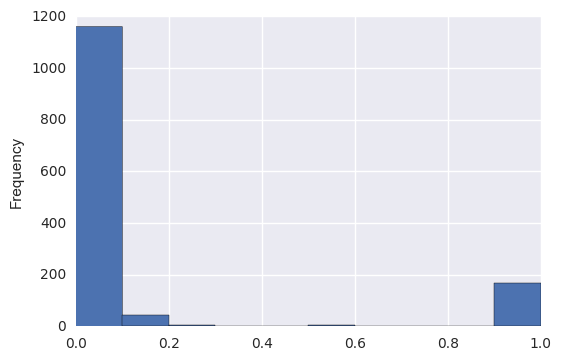

In [121]:
import matplotlib.pyplot as plt
%pylab inline
pd.Series(y_pred_prob).plot.hist(bins=10)

In [122]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.99039958833005182

## Part 6: Comparing models

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [123]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [126]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.01674208,  0.00687344,  0.02099536, ...,  0.03953477,
        0.99692211,  0.00591812])

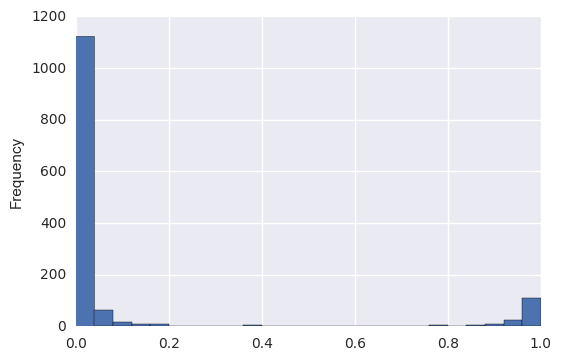

In [127]:
import seaborn as sns

pd.Series(y_pred_prob).plot.hist(bins=25)

In [128]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.98205312275664036

In [129]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.99561482011813141

## Part 7: Examining a model for further insight

We will examine the our **trained Naive Bayes model** to calculate the approximate **"spamminess" of each token**.

In [130]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

3402

In [131]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

[u'00', u'00 sub', u'000', u'000 bonus', u'000 cash', u'000 homeowners', u'000 prize', u'000 xmas', u'02', u'0207', u'03', u'03 2nd', u'04', u'06', u'0800', u'0800 1956669', u'0800 542', u'08000839402', u'08000839402 call2optout', u'08000930705', u'08000930705 delivery', u'08000938767', u'08000938767 update', u'08001950382', u'08001950382 call2optout', u'08002986906', u'0808', u'0808 145', u'0845', u'0870', u'0870 national', u'08701417012', u'08701417012 profit', u'08702840625', u'08702840625 comuk', u'08707509020', u'08707509020 just', u'0871', u'08712300220', u'08712300220 quoting', u'08712405020', u'08712460324', u'08712460324 10p', u'08718720201', u'09050090044', u'09050090044 toclaim', u'09061209465', u'09061209465 suprman', u'09061221066', u'09061221066 fromm']


In [132]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

[u'www ldew', u'www ringtones', u'www sms', u'www tlp', u'www urawinner', u'wylie', u'xchat', u'xchat final', u'xmas', u'xmas prize', u'xuhui', u'xx', u'xxx', u'xxxx', u'xy', u'ya', u'yahoo', u'yan', u'yan jiu', u'yar', u'yar lor', u'yay', u'yeah', u'yeah got', u'yeah ll', u'yeah probably', u'yeah sure', u'year', u'year special', u'years', u'yep', u'yes', u'yes callback', u'yes princess', u'yest', u'yesterday', u'yetunde', u'yijue', u'ym', u'yo', u'yoga', u'yr', u'yr prize', u'yrs', u'yummy', u'yup', u'yup ok', u'yup thk', u'zed', u'zed 08701417012']


In [133]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[  0.,   0.,   0., ...,   4.,   0.,   0.],
       [  5.,   3.,  23., ...,   0.,   6.,   3.]])

In [134]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 3402)

In [135]:
# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

array([ 0.,  0.,  0., ...,  4.,  0.,  0.])

In [136]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([  5.,   3.,  23., ...,   0.,   6.,   3.])

In [137]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')

In [138]:
tokens.sort_values('spam')[-100:]

,ham,spam
token,,
valid 12hrs,0.0,16.0
sae,0.0,16.0
prize claim,0.0,16.0
special,26.0,16.0
national rate,0.0,16.0
national,0.0,16.0
12hrs,0.0,16.0
5000,0.0,16.0
know,176.0,16.0


In [101]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 3617.,   562.])

Before we can calculate the "spamminess" of each token, we need to avoid **dividing by zero** and account for the **class imbalance**.

In [139]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
hg,1.0,9.0
awarded 1500,1.0,4.0
09061790121,1.0,4.0
prize claim,1.0,17.0
lab,4.0,1.0


In [140]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

,ham,spam
token,,
hg,0.000276,0.016014
awarded 1500,0.000276,0.007117
09061790121,0.000276,0.007117
prize claim,0.000276,0.030249
lab,0.001106,0.001779


In [141]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

,ham,spam,spam_ratio
token,,,
hg,0.000276,0.016014,57.923488
awarded 1500,0.000276,0.007117,25.743772
09061790121,0.000276,0.007117,25.743772
prize claim,0.000276,0.030249,109.411032
lab,0.001106,0.001779,1.608986


In [144]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False).head()

,ham,spam,spam_ratio
token,,,
claim,0.000276,0.158363,572.798932
prize,0.000276,0.135231,489.131673
150p,0.000276,0.087189,315.361210
tone,0.000276,0.085409,308.925267
guaranteed,0.000276,0.076512,276.745552


In [145]:
tokens.sort_values('spam_ratio', ascending=False).tail()

,ham,spam,spam_ratio
token,,,
da,0.032900,0.001779,0.054084
lor,0.032900,0.001779,0.054084
lt gt,0.056953,0.001779,0.031242
lt,0.064142,0.001779,0.027741
gt,0.064971,0.001779,0.027387


In [ ]:
# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

## Part 8: Practicing this workflow on another dataset

Please open the **`exercise.ipynb`** notebook (or the **`exercise.py`** script).

## Part 9: Tuning the vectorizer (discussion)

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [108]:
# show default parameters for CountVectorizer
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!